# importing packages 

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import seaborn as sns 
from sklearn.metrics import classification_report,confusion_matrix
import joblib


In [59]:
df=pd.read_csv("Iris.csv")

In [60]:
#reading the top 5 values in the data set
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [61]:
#reading the top tail values in the data set 
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [62]:
#checking the shape of the data set
df.shape

(150, 6)

In [63]:
#checking the size of the data set 
df.size

900

In [64]:
#info about the data set 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [65]:
#describing the data set 
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [66]:
#seeing the data types in the data set
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [67]:
#seeing the column names in  the data set
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [68]:
#seeing the null values in the data set
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

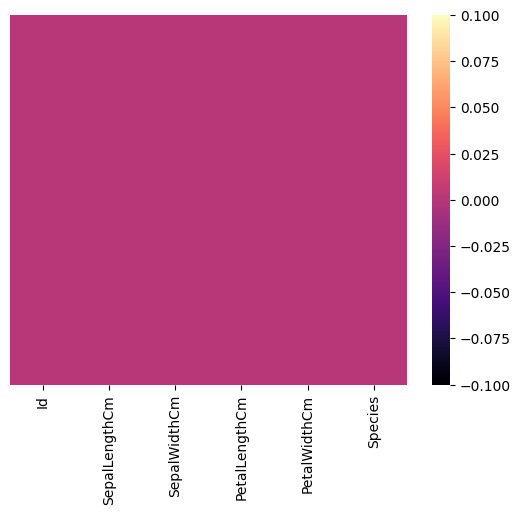

In [69]:
#seeing the null values through the heatmap
sns.heatmap(df.isna(),yticklabels=False,cmap="magma")

In [70]:
num=df.select_dtypes(include=np.number)

<Axes: >

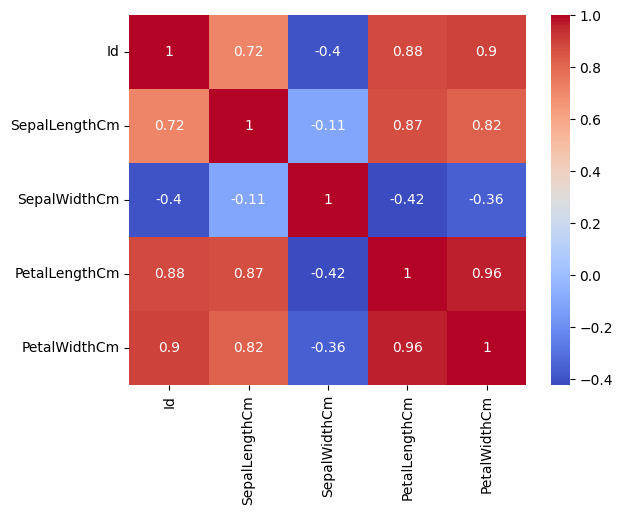

In [71]:
#now seeing the  correlation among the variables 
sns.heatmap(num.corr(),annot=True,cmap="coolwarm")

In [72]:
#the id column in the data set is unwanted so we have to remove the id column
df.drop("Id",axis=1,inplace=True)

In [73]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# box plots 

<Axes: >

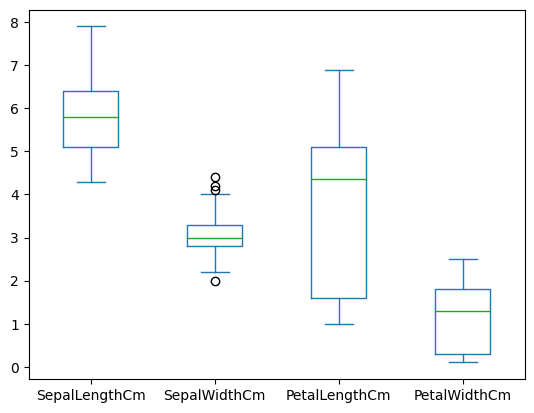

In [74]:
#now let us plot some of the graphs to visualize the data set 
df.plot.box()

<Axes: ylabel='Frequency'>

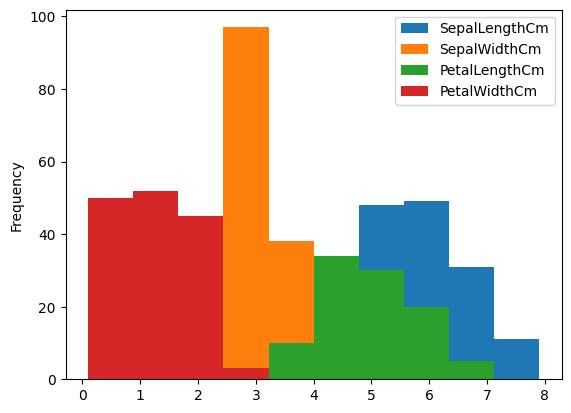

In [75]:
#let us see the histogram 
df.plot.hist()

<Axes: ylabel='Density'>

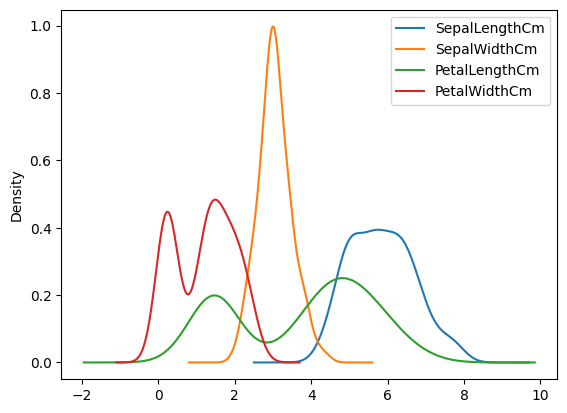

In [76]:
#let us see the kde plots 
df.plot.kde()

In [77]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

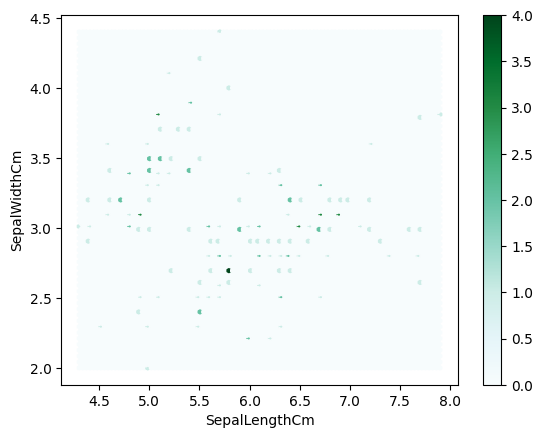

In [78]:
#let us see the hexabin plot
df.plot.hexbin(x="SepalLengthCm",y="SepalWidthCm")

In [79]:
import warnings
warnings.filterwarnings("ignore")

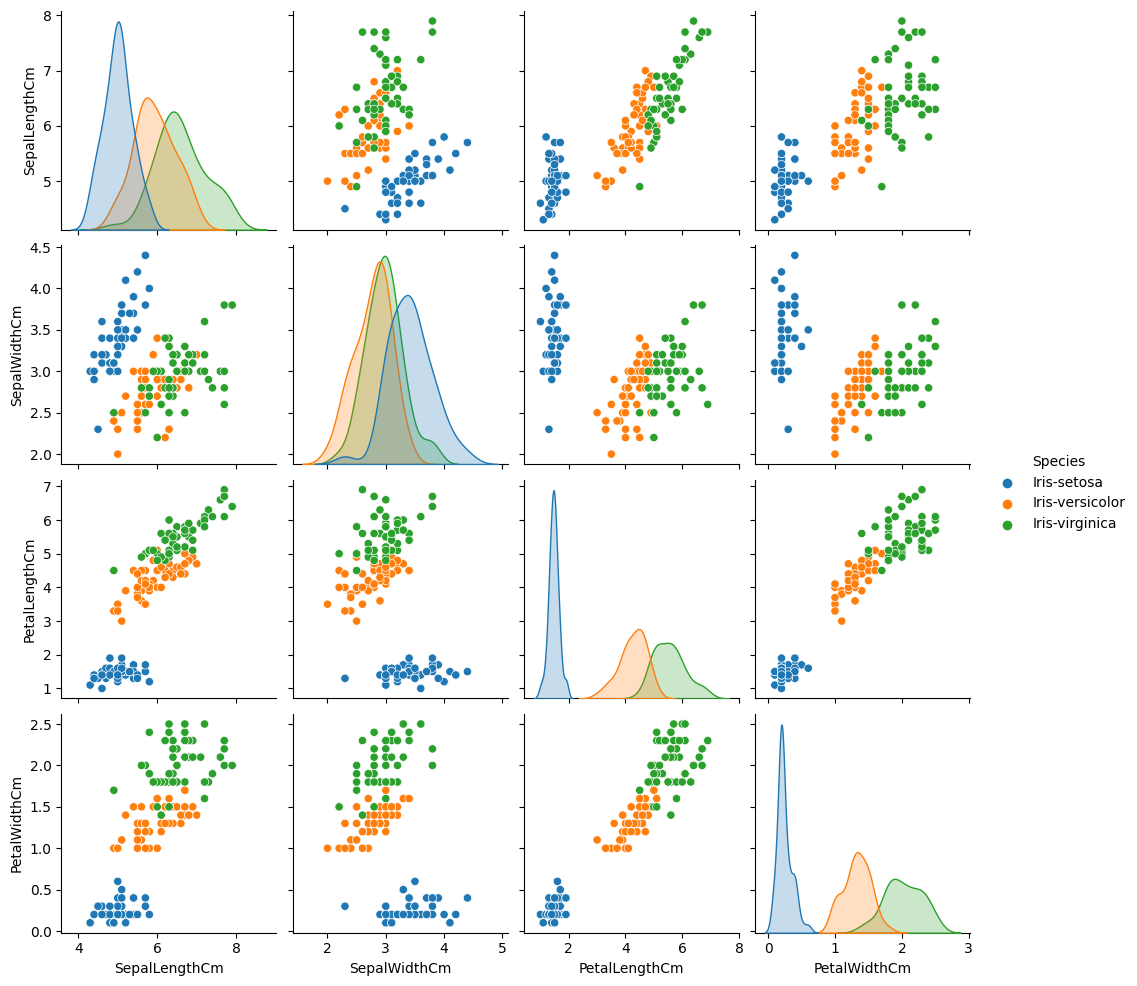

In [80]:
sns.pairplot(df,hue="Species")

In [81]:
#spliting the data set into dependent and independent variabes in the data set
x=df.drop("Species",axis=1)
y=df["Species"]

In [82]:
#doing the label encoding for the column species
from sklearn.preprocessing import LabelEncoder

In [83]:
lab=LabelEncoder()
y=lab.fit_transform(y)

In [84]:
from sklearn.utils import shuffle

In [85]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [86]:
X_shuffled, y_shuffled = shuffle(x, y, random_state=42)

In [87]:
y_shuffled 

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0,
       1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0,
       0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1,
       1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2,
       0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [90]:
#now splitin of the data set into training testing data 
x_train,x_test,y_train,y_test=train_test_split(X_shuffled,y_shuffled,test_size=0.2,random_state=2)



In [91]:
y_train

array([2, 2, 1, 2, 1, 0, 0, 2, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 1, 2, 1, 2,
       1, 2, 0, 1, 2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 2, 1, 2, 0, 1, 2, 1,
       0, 0, 2, 1, 0, 0, 2, 0, 1, 1, 2, 0, 2, 2, 1, 0, 2, 1, 2, 1, 0, 1,
       0, 2, 0, 1, 2, 2, 2, 1, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1,
       1, 2, 2, 2, 0, 0, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0, 0, 1, 0, 0, 0,
       2, 1, 1, 2, 2, 1, 0, 0, 2, 1])

In [92]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


# LogisticRegression

In [93]:
log=LogisticRegression()

In [94]:
log.fit(x_train,y_train)

LogisticRegression()

In [95]:
preds=log.predict(x_test)

In [96]:
preds

array([1, 1, 2, 0, 2, 1, 2, 0, 0, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 2, 1, 1,
       2, 2, 0, 0, 2, 2, 0, 1])

In [97]:
#classsification report 
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.91      0.95        11
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



<Axes: >

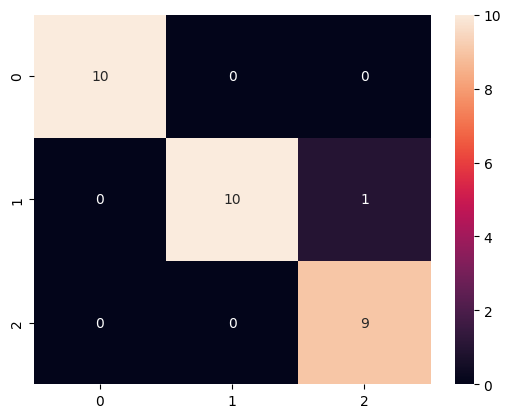

In [98]:
#drawing the confusion_matrix
sns.heatmap(confusion_matrix(y_test,preds),annot=True)

# Random Forest Classifier


In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
rand=RandomForestClassifier()

In [101]:
rand.fit(x_train,y_train)

RandomForestClassifier()

In [104]:
pred=rand.predict(x_test)

In [105]:
pred

array([1, 1, 2, 0, 2, 1, 2, 0, 0, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 2, 1, 1,
       2, 2, 0, 0, 2, 2, 0, 1])

In [106]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.91      0.95        11
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [107]:
print(confusion_matrix(y_test,pred))

[[10  0  0]
 [ 0 10  1]
 [ 0  0  9]]


# Artificial Nueral network

In [122]:
#model development using the tensorflow ann
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [123]:
model=Sequential()
model.add(Dense(50,activation="relu"))
model.add(Dense(20,activation='relu'))
model.add(Dense(3,activation="softmax"))

In [124]:
model.compile(optimizer="adam", 
              loss="SparseCategoricalCrossentropy",
              metrics=['accuracy'])

In [125]:
history=model.fit(x_train,y_train,epochs=50)

Epoch 1/50
4/4 [==============================] - 0s 3ms/step - loss: 2.3467 - accuracy: 0.3333
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 1.8127 - accuracy: 0.3333
Epoch 3/50
4/4 [==============================] - 0s 0s/step - loss: 1.4578 - accuracy: 0.3333
Epoch 4/50
4/4 [==============================] - 0s 7ms/step - loss: 1.2021 - accuracy: 0.3333
Epoch 5/50
4/4 [==============================] - 0s 5ms/step - loss: 1.0843 - accuracy: 0.5250
Epoch 6/50
4/4 [==============================] - 0s 5ms/step - loss: 1.0208 - accuracy: 0.5250
Epoch 7/50
4/4 [==============================] - 0s 0s/step - loss: 0.9792 - accuracy: 0.4500
Epoch 8/50
4/4 [==============================] - 0s 0s/step - loss: 0.9409 - accuracy: 0.6167
Epoch 9/50
4/4 [==============================] - 0s 4ms/step - loss: 0.9085 - accuracy: 0.6833
Epoch 10/50
4/4 [==============================] - 0s 3ms/step - loss: 0.8771 - accuracy: 0.7083
Epoch 11/50
4/4 [=========================

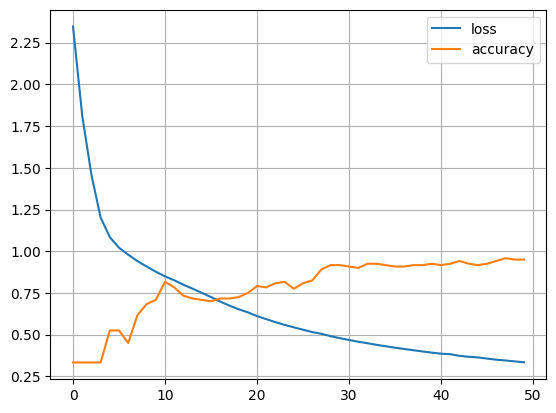

In [127]:
data=pd.DataFrame(history.history)
data.plot()
plt.grid(True)

In [128]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 129ms/step - loss: 0.3294 - accuracy: 0.9667


[0.32940495014190674, 0.9666666388511658]

In [131]:
#when compared to all other model we got more accuracy for the random forest classifier
#let use save the model randoom forest classifier
joblib.dump(filename="iris_class",value=rand)

['iris_class']